In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
import graphviz

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format #only concern 2 digits after the decimal point
pd.set_option('display.width', 75) #safer option than .set_option.display.width bc regex will match to multiple option names
pd.set_option('display.max_columns', 10)

In [ ]:
#path is /content/drive/MyDrive/Coding_projects/Chang-COVID/Tidy-COVID-Data.csv

In [ ]:
tidy_covid_data_0 = pd.read_csv('/content/drive/MyDrive/Coding_projects/Chang-COVID/Tidy-COVID-Data.csv', \
names=['County','Zip_Code','SNI_2020_Index','SNI_Rank','Phase_Number','Phase_Start_Date','Phase_End_Date','AVG_V_per_D'], \
skiprows=1,\
parse_dates=['Phase_Number','Phase_Start_Date','Phase_End_Date'],\
low_memory=False)



In [ ]:
type(tidy_covid_data_0)

pandas.core.frame.DataFrame

In [ ]:
tidy_covid_data_0.head(7)

,County,Zip_Code,SNI_2020_Index,SNI_Rank,Phase_Number,Phase_Start_Date,Phase_End_Date,AVG_V_per_D
0,Dallas,75041,92.90,5,1,2019-12-10,2020-03-09,6.60
1,Dallas,75041,92.90,5,2,2020-03-10,2020-03-23,6.43
2,Dallas,75041,92.90,5,3,2020-03-24,2020-04-21,3.96
3,Dallas,75041,92.90,5,4,2020-05-01,2020-08-01,4.75
4,Dallas,75042,95.70,5,1,2019-12-10,2020-03-09,6.71
5,Dallas,75042,95.70,5,2,2020-03-10,2020-03-23,6.29
6,Dallas,75042,95.70,5,3,2020-03-24,2020-04-21,3.72


In [ ]:
tidy_covid_data_0.dtypes

County                      object
Zip_Code                     int64
SNI_2020_Index             float64
SNI_Rank                     int64
Phase_Number                object
Phase_Start_Date    datetime64[ns]
Phase_End_Date      datetime64[ns]
AVG_V_per_D                float64
dtype: object

In [ ]:
tidy_covid_data_0.shape

(328, 8)

In [ ]:
tidy_covid_data_0.rename(columns={'Phase_Start_Date':'Start_measuredate'}, inplace=True)

In [ ]:
tidy_covid_data_0.rename(columns={'Phase_End_Date':'End_measuredate'}, inplace=True)

In [ ]:
tidy_covid_data_0.rename(columns={'AVG_V_per_D':'Visits_Daily'}, inplace=True)

In [ ]:
tidy_covid_data_0.dtypes

County                       object
Zip_Code                      int64
SNI_2020_Index              float64
SNI_Rank                      int64
Phase_Number                 object
Start_measuredate    datetime64[ns]
End_measuredate      datetime64[ns]
Visits_Daily                float64
dtype: object

In [ ]:
tidy_covid_data_0.shape

(328, 8)

In [ ]:
tidy_covid_data_0.isnull().sum() #sum treats T=1, F=0; chained boolean result to sum method

County               0
Zip_Code             0
SNI_2020_Index       0
SNI_Rank             0
Phase_Number         0
Start_measuredate    0
End_measuredate      0
Visits_Daily         0
dtype: int64

In [ ]:
#tidy_covid_data_0.dropna(subset=['AVG_V_per_D'], inplace=True) #subset, inplace=TRUE is used to indicate which column to check for missing <NaN> objects, keep the object inplace to REPLACE old col name with NEW col name in memory
#tidy_covid_data_0.shape

(328, 8)

In [ ]:
tidy_covid_data_0.head(7)

,County,Zip_Code,SNI_2020_Index,SNI_Rank,Phase_Number,Start_measuredate,End_measuredate,Visits_Daily
0,Dallas,75041,92.90,5,1,2019-12-10,2020-03-09,6.60
1,Dallas,75041,92.90,5,2,2020-03-10,2020-03-23,6.43
2,Dallas,75041,92.90,5,3,2020-03-24,2020-04-21,3.96
3,Dallas,75041,92.90,5,4,2020-05-01,2020-08-01,4.75
4,Dallas,75042,95.70,5,1,2019-12-10,2020-03-09,6.71
5,Dallas,75042,95.70,5,2,2020-03-10,2020-03-23,6.29
6,Dallas,75042,95.70,5,3,2020-03-24,2020-04-21,3.72


In [ ]:
tidy_covid_data_0.index

RangeIndex(start=0, stop=328, step=1)

In [ ]:
tidy_covid_data_0.index.nunique()

328

In [ ]:
tidy_covid_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   County             328 non-null    object        
 1   Zip_Code           328 non-null    int64         
 2   SNI_2020_Index     328 non-null    float64       
 3   SNI_Rank           328 non-null    int64         
 4   Phase_Number       328 non-null    object        
 5   Start_measuredate  328 non-null    datetime64[ns]
 6   End_measuredate    328 non-null    datetime64[ns]
 7   Visits_Daily       328 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 20.6+ KB


In [ ]:
tidy_covid_data_0.sample(4, random_state=1).T

,58,261,277,225
County,Dallas,Dallas,Dallas,Dallas
Zip_Code,75217,75039,75089,75081
SNI_2020_Index,97.70,6.00,10.90,27.50
SNI_Rank,5,1,1,2
Phase_Number,3,2,2,2
Start_measuredate,2020-03-24 00:00:00,2020-03-10 00:00:00,2020-03-10 00:00:00,2020-03-10 00:00:00
End_measuredate,2020-04-21 00:00:00,2020-03-23 00:00:00,2020-03-23 00:00:00,2020-03-23 00:00:00
Visits_Daily,18.40,0.64,1.57,2.21


In [ ]:
tidy_covid_data_1 = tidy_covid_data_0.copy()

In [ ]:
#selecting rows: loc
#selecting columns: []
#example lowsleep3pluschildren = nls97.loc[(nls97.nightlyhrssleep<=4) & (nls97.childathome>=3), ['nightlyhrssleep','childathome']]

In [ ]:
tidy_covid_data_1.loc[:, tidy_covid_data_1.dtypes == 'object'] = \
  tidy_covid_data_1.select_dtypes(['object']). \
  apply(lambda x: x.astype('category'))

In [ ]:
# show the names of columns with category data type and check for number of missings
catcols = tidy_covid_data_1.select_dtypes(include=["category"]).columns
tidy_covid_data_1[catcols].isnull().sum()

County          0
Phase_Number    0
dtype: int64

In [ ]:
tidy_covid_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   County             328 non-null    category      
 1   Zip_Code           328 non-null    int64         
 2   SNI_2020_Index     328 non-null    float64       
 3   SNI_Rank           328 non-null    int64         
 4   Phase_Number       328 non-null    category      
 5   Start_measuredate  328 non-null    datetime64[ns]
 6   End_measuredate    328 non-null    datetime64[ns]
 7   Visits_Daily       328 non-null    float64       
dtypes: category(2), datetime64[ns](2), float64(2), int64(2)
memory usage: 16.4 KB


In [ ]:
tidy_covid_data_1[['Zip_Code']].dtypes

Zip_Code    int64
dtype: object

In [ ]:
# example using dictionary:
# df = df.astype({"Name":'category', "Age":'int64'})
tidy_covid_data_1 = tidy_covid_data_1.astype({"Zip_Code":'category', "SNI_Rank":'category'})
tidy_covid_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   County             328 non-null    category      
 1   Zip_Code           328 non-null    category      
 2   SNI_2020_Index     328 non-null    float64       
 3   SNI_Rank           328 non-null    category      
 4   Phase_Number       328 non-null    category      
 5   Start_measuredate  328 non-null    datetime64[ns]
 6   End_measuredate    328 non-null    datetime64[ns]
 7   Visits_Daily       328 non-null    float64       
dtypes: category(4), datetime64[ns](2), float64(2)
memory usage: 15.3 KB


In [ ]:
# show the names of columns with category data type
catcols = tidy_covid_data_1.select_dtypes(include=["category"]).columns
tidy_covid_data_1[catcols].isnull().sum() #check for missing values

County          0
Zip_Code        0
SNI_Rank        0
Phase_Number    0
dtype: int64

# Generate Frequencies for Categorical Variables

In [ ]:
#tidy_covid_data_1.select_dtypes(include=["category"]).value_counts(normalize=True)

tidy_covid_data_1.County.value_counts(normalize=True)

Dallas   1.00
Name: County, dtype: float64

In [ ]:
tidy_covid_data_1.Zip_Code.value_counts(normalize=True)

75254   0.01
75088   0.01
75104   0.01
75115   0.01
75116   0.01
        ... 
75223   0.01
75224   0.01
75225   0.01
75226   0.01
75001   0.01
Name: Zip_Code, Length: 82, dtype: float64

In [ ]:
tidy_covid_data_1.SNI_Rank.value_counts(normalize=True)

5   0.37
1   0.23
4   0.17
3   0.13
2   0.10
Name: SNI_Rank, dtype: float64

In [ ]:
tidy_covid_data_1.Phase_Number.value_counts(normalize=True)

4   0.25
3   0.25
2   0.25
1   0.25
Name: Phase_Number, dtype: float64

In [ ]:
tidy_covid_data_1.SNI_2020_Index.value_counts(normalize=True)

88.50   0.02
95.20   0.02
94.60   0.02
6.60    0.02
93.80   0.02
        ... 
82.10   0.01
99.40   0.01
66.10   0.01
42.80   0.01
68.20   0.01
Name: SNI_2020_Index, Length: 77, dtype: float64

In [ ]:
tidy_covid_data_1.head(2)

,County,Zip_Code,SNI_2020_Index,SNI_Rank,Phase_Number,Start_measuredate,End_measuredate,Visits_Daily
0,Dallas,75041,92.90,5,1,2019-12-10,2020-03-09,6.60
1,Dallas,75041,92.90,5,2,2020-03-10,2020-03-23,6.43


In [ ]:
pd.set_option('display.max_rows', None)

freqout = open('/content/drive/MyDrive/Coding_projects/Chang-COVID/categorical_vars_freq.txt',\
               'w')

In [ ]:
for col in tidy_covid_data_1.select_dtypes(exclude=["datetime64"]):
  print(col, "----------------------", "frequencies",
  tidy_covid_data_1[col].value_counts(sort=False),"percentages",
  tidy_covid_data_1[col].value_counts(normalize=True, sort=False),
  sep="\n\n", end="\n\n\n", file=freqout)

freqout.close()

In [ ]:
#categorical_vars_freq = tidy_covid_data_1.loc[:,\
#                                              ['Zip_Code','SNI_2020_Index','SNI_Rank','Phase_Number']]

In [ ]:
#categorical_vars_freq

,Zip_Code,SNI_2020_Index,SNI_Rank,Phase_Number
0,75041,92.90,5,1
1,75041,92.90,5,2
2,75041,92.90,5,3
3,75041,92.90,5,4
4,75042,95.70,5,1
...,...,...,...,...
323,75244,6.70,1,4
324,75248,8.70,1,1
325,75248,8.70,1,2
326,75248,8.70,1,3


# Generate Summary Stats for Conintuous Variables

In [ ]:
pd.set_option('display.width', 75)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 20)

In [ ]:
tidy_covid_data_1.shape

(328, 8)

In [ ]:
tidy_covid_data_1.sample(2, random_state=1).T

,58,261
County,Dallas,Dallas
Zip_Code,75217,75039
SNI_2020_Index,97.70,6.00
SNI_Rank,5,1
Phase_Number,3,2
Start_measuredate,2020-03-24 00:00:00,2020-03-10 00:00:00
End_measuredate,2020-04-21 00:00:00,2020-03-23 00:00:00
Visits_Daily,18.40,0.64


In [ ]:
tidy_covid_data_1.dtypes

County                     category
Zip_Code                   category
SNI_2020_Index              float64
SNI_Rank                   category
Phase_Number               category
Start_measuredate    datetime64[ns]
End_measuredate      datetime64[ns]
Visits_Daily                float64
dtype: object

In [ ]:
tidy_covid_data_1.describe()

,SNI_2020_Index,Visits_Daily
count,328.00,328.00
mean,57.58,5.98
std,34.94,6.72
min,0.20,0.13
25%,20.90,1.92
50%,67.85,3.95
75%,91.70,6.94
max,99.40,47.79


In [ ]:
numericvars = ['SNI_2020_Index','Visits_Daily']
tidy_covid_data_1[numericvars].quantile(np.arange(0.0, 1.1, 0.1))

,SNI_2020_Index,Visits_Daily
0.00,0.20,0.13
0.10,6.70,0.89
0.20,13.90,1.63
0.30,27.50,2.28
0.40,47.60,3.06
0.50,67.85,3.95
0.60,80.30,5.14
0.70,90.70,6.11
0.80,93.80,8.19
0.90,95.60,13.99


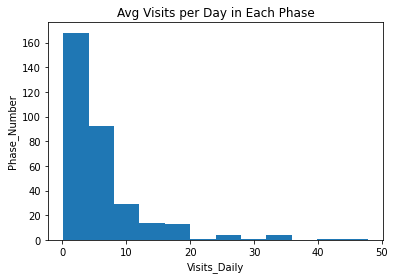

In [ ]:
# view the distribution of total cases
#plt.hist(tidy_covid_data_1['Visits_Daily'], bins=12)
##plt.title("Avg Visits per Day in Each Phase")
#plt.xlabel('Visits_Daily')
#plt.ylabel("Phase_Number")
#plt.show()

# Univariate Outliers